In [1]:
import os
from tqdm import tqdm
import numpy as np

from pyfstat import GlitchWriter, Writer
from pyfstat.utils import get_sft_as_arrays
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

def normalize_array_with_nan(arr):
    """
    Normalizes a 2D array while ignoring NaN values.
    
    Parameters:
    arr (np.ndarray): Input 2D array with shape (m, n)
    
    Returns:
    np.ndarray: Normalized array with NaN values preserved
    """
    # Compute mean and standard deviation, ignoring NaN values
    max = np.nanmax(arr)
    min = np.nanmin(arr)
    
    # Normalize the array, keeping NaN values as they are
    normalized_arr = (arr - min)/(max-min)
    
    return normalized_arr

def plot_spectrograms(timestamps, frequency, fourier_data):
    fig, axs = plt.subplots(1, 1, figsize=(16, 10))
    axs = [axs]
    for ax in axs:
        ax.set(xlabel="Days", ylabel="Frequency [Hz]")

    time_in_days = (timestamps - timestamps[0]) / 86400

    axs[0].set_title("H1")
    c = axs[0].pcolormesh(
        time_in_days,
        frequency,
        fourier_data,
        norm=colors.CenteredNorm(),
    )
    fig.colorbar(c, ax=axs[0], orientation="horizontal", label="Fourier Amplitude")
    return fig, axs



label = "test"
outdir = os.path.join("testdata", label)


25-09-11 10:34:55.105 pyfstat INFO    : Running PyFstat version 2.2.1+3.6fbce518.dirty


/home/hoitim.cheung/.conda/envs/glitch/lib/python3.10/site-packages/PyFstat-2.2.1+3.6fbce518.dirty-py3.10.egg/pyfstat/core.py:13: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


25-09-11 10:34:58.523 pyfstat.utils.importing INFO    : No $DISPLAY environment variable found, so importing matplotlib.pyplot with non-interactive 'Agg' backend.


In [2]:

ts = 1368970000
frequency, timestamps, fourier_data = get_sft_as_arrays('./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft')


25-09-11 10:35:08.243 pyfstat.utils.sft INFO    : Loading 4800 SFTs from H1...


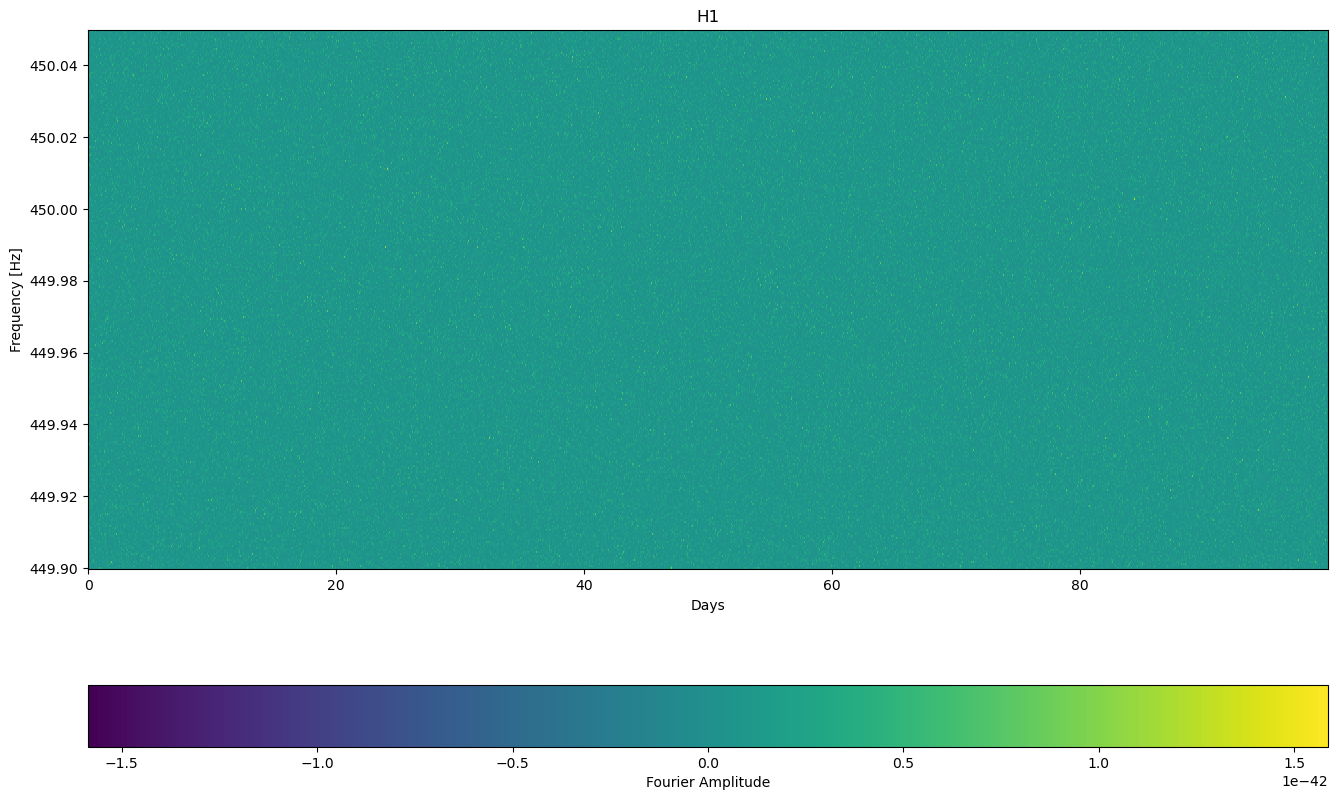

In [5]:
det = 'H1'
data1 = fourier_data[det].real ** 2 + fourier_data[det].imag ** 2

idx = np.where((frequency<450.05)*(frequency>449.9))[0]
fig, ax = plot_spectrograms(
    timestamps[det], frequency[idx], data1[idx],
);


In [74]:
idx = np.where((frequency<400.075)*(frequency>399.95))[0]

In [ ]:

det = 'H1'
data1 = fourier_data[det].real ** 2 + fourier_data[det].imag ** 2

fig, ax = plot_spectrograms(
    timestamps[det], frequency[idx], data1[idx],
);


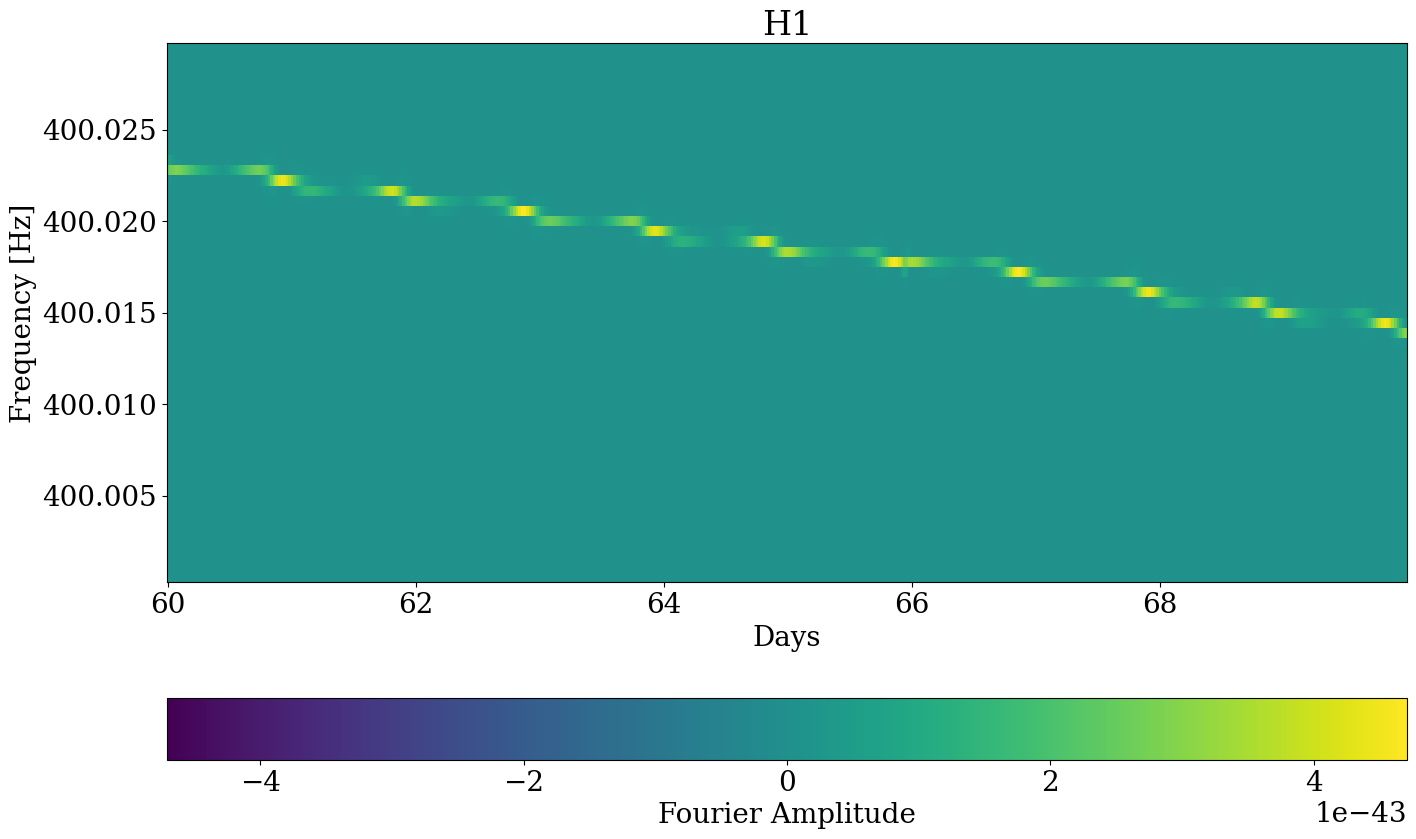

In [72]:
def plot_spectrograms(tstart, timestamps, frequency, fourier_data):
    fig, axs = plt.subplots(1, 1, figsize=(16, 10))
    axs = [axs]
    for ax in axs:
        ax.set(xlabel="Days", ylabel="Frequency [Hz]")

    time_in_days = (timestamps - tstart) / 86400

    axs[0].set_title("H1")
    c = axs[0].pcolormesh(
        time_in_days,
        frequency,
        fourier_data,
        norm=colors.CenteredNorm(),
    )
    fig.colorbar(c, ax=axs[0], orientation="horizontal", label="Fourier Amplitude")
    return fig, axs




det = 'H1'
data1 = fourier_data[det].real ** 2 + fourier_data[det].imag ** 2

idx = np.where((frequency<400.03)*(frequency>400))[0]
fig, ax = plot_spectrograms(
    timestamps[det][0], timestamps[det][48*60:48*70], frequency[idx], data1[idx][:,48*60:48*70],
);


In [84]:

ts = 1368970000
frequency, timestamps, fourier_data = get_sft_as_arrays('/home/hoitim.cheung/tmp/H-64_H1_14400SFT_noise-1368970000-921600.sft')


25-08-21 16:17:03.923 pyfstat.utils.sft INFO    : Loading 64 SFTs from H1...
